<a href="https://colab.research.google.com/github/hermit7999/ML_basic/blob/main/5_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Means

In [21]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [22]:
from google.colab import drive
mountpoint = '/sample_data'
drive.mount(mountpoint, force_remount = True)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('/content/KMeansData.csv')

Mounted at /sample_data


In [23]:
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [24]:
# x  = dataset.iloc[:, :].values
x = dataset.values
#x = dataset.to_numpy()
x[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

## 데이터 시각화(전체 데이터 분포 확인)

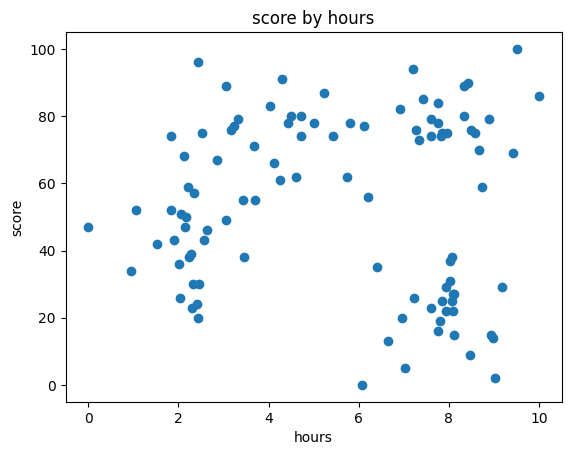

In [25]:
plt.scatter(x[:,0], x[:, 1]) # x축 : hours, y축 : score
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

## 데이터 시각화(축범위 통일)

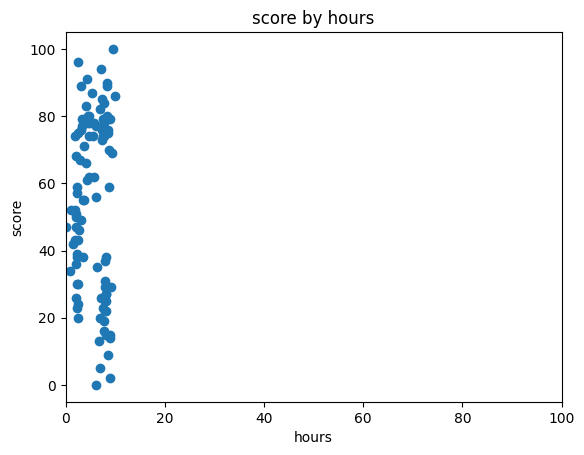

In [26]:
plt.scatter(x[:,0], x[:, 1]) # x축 : hours, y축 : score
plt.title('score by hours')
plt.xlabel('hours')
plt.xlim(0,100)
plt.ylabel('score')
plt.xlim(0,100)
plt.show()

## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

데이터 시각화(스케일링 된 데이

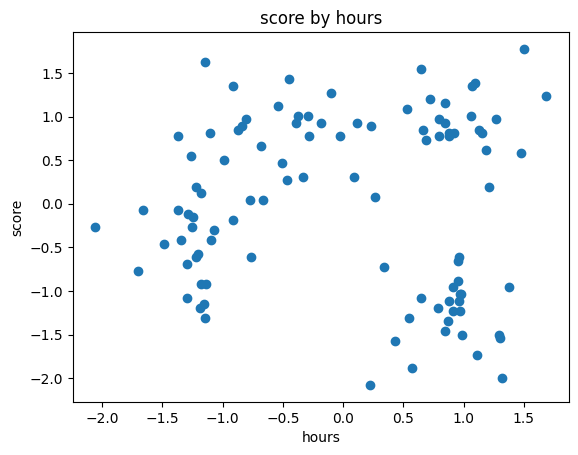

In [28]:
plt.scatter(x[:,0], x[:, 1]) # x축 : hours, y축 : score
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 최적의 K 값 찾기(Elbow Method)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

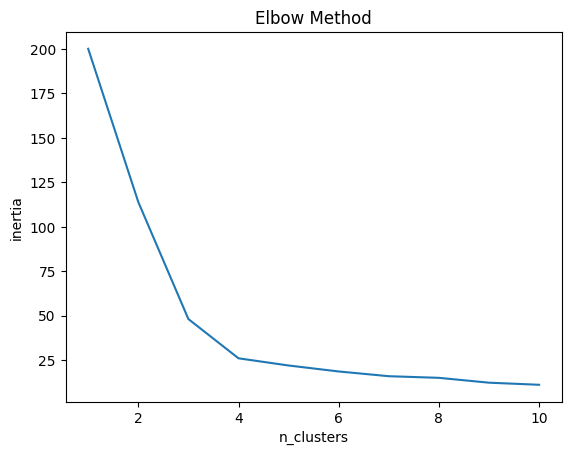

In [30]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 0)
  kmeans.fit(x)
  inertia_list.append(kmeans.inertia_) # 각 지점으로 부터 클러스터 중심값 까지의 거리의 제곱의 합

plt.plot(range(1,11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

### 최적의 K(4) 값으로 KMeans 학습


In [31]:
K = 4 # 최적의 K 값

In [34]:
kmeans = KMeans(n_clusters=K, random_state=0)
#kmeans.fit(x)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3], dtype=int32)

### 데이터 시각화(최적의 K)

In [36]:
centers = kmeans.cluster_centers_
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

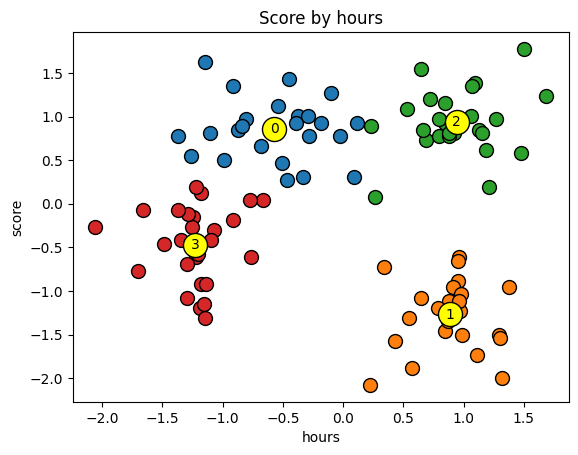

In [41]:
for cluster in range(K):
  plt.scatter(x[y_kmeans == cluster, 0], x[y_kmeans == cluster, 1], s = 100, edgecolor = 'black')
  # plt.scatter(centers[cluster, 0], centers[cluster, 1], s=300, edgecolor='black', color = 'yellow', marker='s')
  plt.scatter(centers[cluster, 0], centers[cluster, 1], s=300, edgecolor='black', color = 'yellow')
  plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va = 'center', ha='center')

plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (스케일링 원복함)

In [42]:
x_org = sc.inverse_transform(x) # Features Scaling 된 데이터를 다시 원복 함
x_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [43]:
centers_org = sc.inverse_transform(centers)
centers_org

array([[ 3.96458333, 76.08333333],
       [ 7.8552    , 20.96      ],
       [ 8.0084    , 78.2       ],
       [ 2.21269231, 41.76923077]])

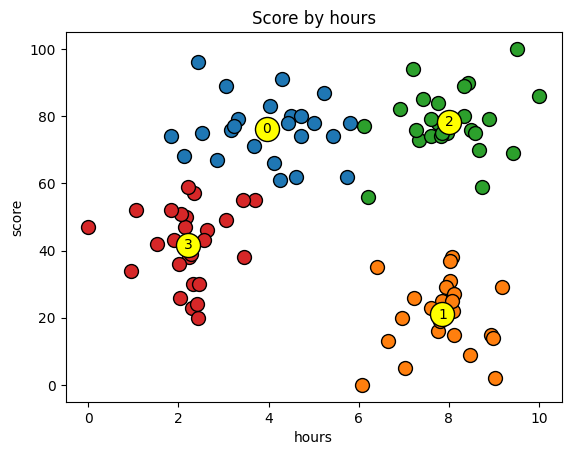

In [44]:
for cluster in range(K):
  plt.scatter(x_org[y_kmeans == cluster, 0], x_org[y_kmeans == cluster, 1], s = 100, edgecolor = 'black')
  # plt.scatter(centers[cluster, 0], centers[cluster, 1], s=300, edgecolor='black', color = 'yellow', marker='s')
  plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s=300, edgecolor='black', color = 'yellow')
  plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va = 'center', ha='center')

plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()